In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
# co-efficient of determination / regression score
# max value is 1.0 (like accuracy for regression problems)
from sklearn.metrics import r2_score 

In [ ]:
# y = m1*x1 + m2*x2 + m3*x3 + .......... + mn*xn + c  - multi linear regression formula

# y = m*x + c  - simple linear regression formula 

In [ ]:
# link = 'https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/data'

In [ ]:
df2 = pd.read_csv('/content/CarPrice_Assignment.csv')
df2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
print(df2.info())
print('\n')
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# for checking NULL VALUES in data set

print(df2.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


**DATA CLEANING**

In [ ]:
# NO TEXT DATA IS USED IN MACHINE LEARNING
# for selecting ONLY INT & FLOAT VALUES :

df3 = df2.select_dtypes(include = ['int64' , 'float64'])
df3


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


**DATA VISUALISATION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


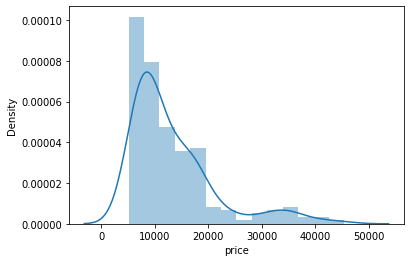

In [ ]:
# DATA VISUALISATION

sns.distplot(df3['price'])
plt.show()

In [ ]:
# DROPPING COLUMNS
# AXIS = 0 , DROP -> ROW
# AXIS = 1 , DROP -> COLUMN

df4 = df3.drop(['car_ID' , 'symboling'], axis = 1)
df4

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# LEAVING PRICE COLUMN
x1 = df4.iloc[:,0:13] .values

# GIVING ONLY PRICE COLUMN
y1 = df4.iloc[:,-1] .values

In [ ]:
# instead of taking x and y as i/p and o/p we are further splitting those variables
# by default the split is 75:25 
#to change give test_size = 0.2 (80:20)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)
from sklearn.model_selection import train_test_split 
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=0)

In [ ]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(153, 13)
(52, 13)
(153,)
(52,)


In [ ]:
# " TRAINING THE MACHINE "

model1 = LinearRegression()
model1.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
# PREDICTING OUTPUT

y1_pred = model1.predict(x1_test)
y1_pred 

array([ 6235.42500602, 19790.61817546, 14979.27612129, -1134.1351902 ,
       11132.32548236, 13518.17757352,  5683.20921384,  6283.89365797,
       23126.98530885,  8202.87829636, 16141.08746789, 37186.620833  ,
        9399.71398237, 14235.89743835,  5757.94201887, 13165.16702932,
       11152.82221655, 18568.63307141, 10141.86686901,  6287.15927099,
       10682.51479525, 17992.19878976, 10833.41323372, 13614.7038942 ,
       21454.99910165,  8202.97012341,  6873.2042475 , 17805.91105615,
        6902.39516583,  5801.50097042,  9649.90265499, 11070.09789029,
       21045.77815857,  8246.11235138,  5936.63781937, 26615.14377317,
       10378.97946806, 16778.39190457,  6689.66441559, 37043.76928874,
        5661.41569819, 15623.82529796, 30395.98293889, 17901.79311012,
       11439.71150878,  7274.32045138,  6977.32359472, 15485.01565233,
       10277.75067436,  9831.92371684, 18843.28365874,  6807.29317223])

In [ ]:
# ACTUAL v/s PREDICTED

df_m = pd.DataFrame({'ACTUAL OUTPUT' : y1_test , 'PREDICTED OUTPUT' : y1_pred})
df_m

,ACTUAL OUTPUT,PREDICTED OUTPUT
0,6795.0,6235.425006
1,15750.0,19790.618175
2,15250.0,14979.276121
3,5151.0,-1134.135190
4,9995.0,11132.325482
5,11199.0,13518.177574
6,5389.0,5683.209214
7,7898.0,6283.893658
8,17199.0,23126.985309
9,6529.0,8202.878296


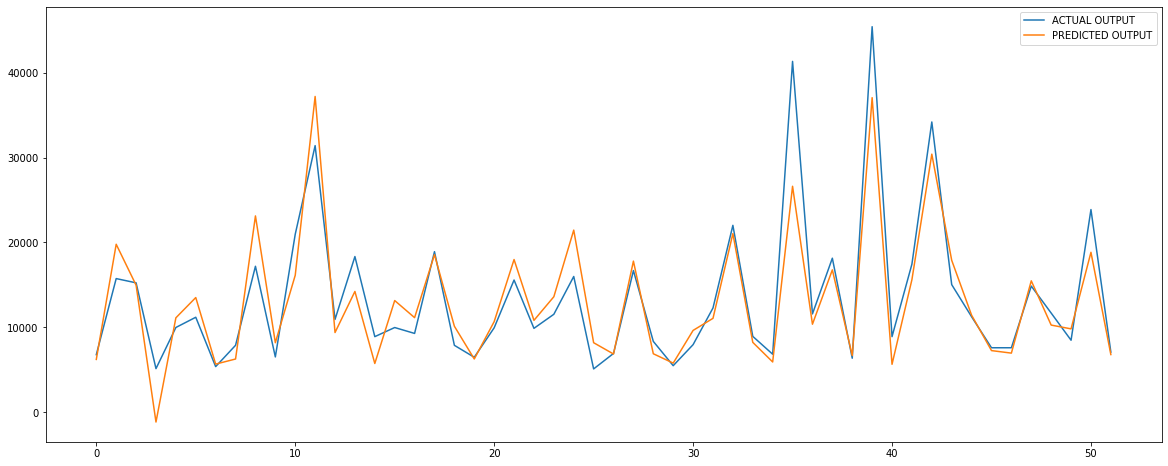

In [ ]:
# figsize = increasing figure size.

df_m.plot(figsize=(20,8))

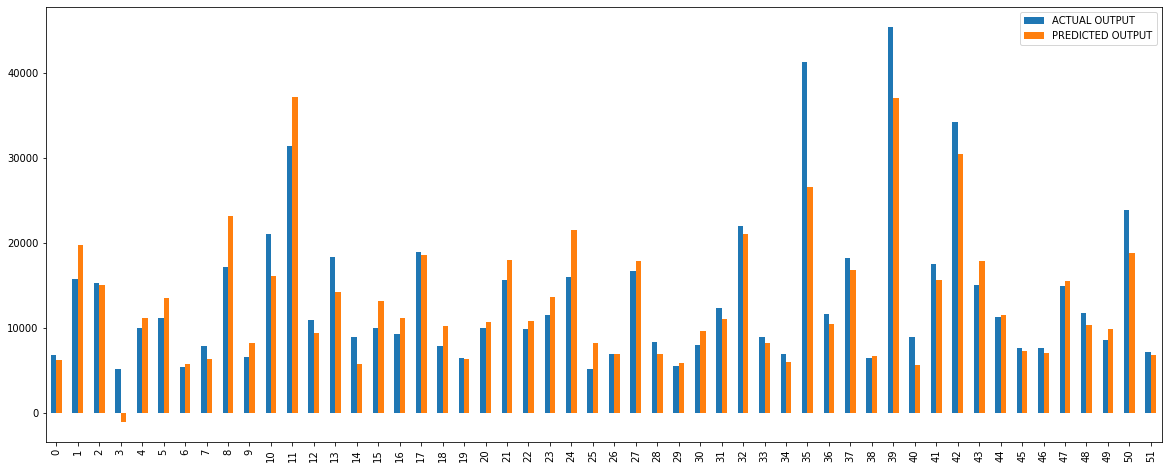

In [ ]:
df_m.plot(figsize=(20,8), kind = 'bar')


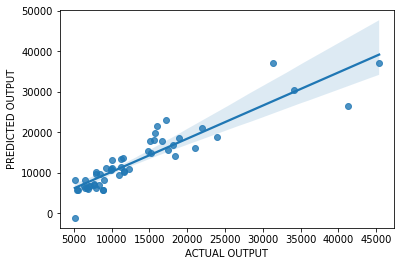

In [ ]:
sns.regplot(x = 'ACTUAL OUTPUT' , y = 'PREDICTED OUTPUT' , data = df_m)
plt.show()

In [ ]:
# REGRESSION SCORE
r2_score(y1_test,y1_pred)

0.8387970914426268

In [ ]:
# MODEL PERSISTANCE (creating a file to share and use it elsewhere as a model)
# pickling
# TWO STEPS  :-

# 1. Serialization step (creating the file and storing the model inside it) 
# 2. Deserialization step (using the stored model in realtime applications (ex - in your website, in your mobile app))

In [ ]:
import pickle 

# storing a model inside a file
# wb - write byte
pickle.dump(model1,open("linear.pkl","wb")) 

In [ ]:
#deserialization step 
import pickle
reload_model = pickle.load(open("linear.pkl","rb"))

In [ ]:
# input = 13 values in a row of dataframe.
# It will give the req output wrt of 13 input values


reload_model.predict([[88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27]])

array([13418.54956368])